In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
df = pd.read_csv("../data/Cleaned_Viral_Social_Media_Trends.csv")


In [2]:
print(df.head())
print(df.info())
print(df.describe(include="all"))
print(df.isna().sum())

  Post_ID   Post_Date   Platform     Hashtag Content_Type     Region    Views  \
0  Post_1  2022-01-13     TikTok  #Challenge        Video         UK  4163464   
1  Post_2  2022-05-13  Instagram  #Education       Shorts      India  4155940   
2  Post_3  2022-01-07    Twitter  #Challenge        Video     Brazil  3666211   
3  Post_4  2022-12-05    YouTube  #Education       Shorts  Australia   917951   
4  Post_5  2023-03-23     TikTok      #Dance         Post     Brazil    64866   

    Likes  Shares  Comments Engagement_Level  
0  339431   53135     19346             High  
1  215240   65860     27239           Medium  
2  327143   39423     36223           Medium  
3  127125   11687     36806              Low  
4  171361   69581      6376           Medium  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-

In [3]:
df["Post_Date"] = pd.to_datetime(df["Post_Date"], errors="coerce")
df["Year"] = df["Post_Date"].dt.year
df["Month"] = df["Post_Date"].dt.month
df["Week"] = df["Post_Date"].dt.to_period("W")

In [4]:
df["Total_Engagement"] = df["Likes"] + df["Shares"] + df["Comments"]

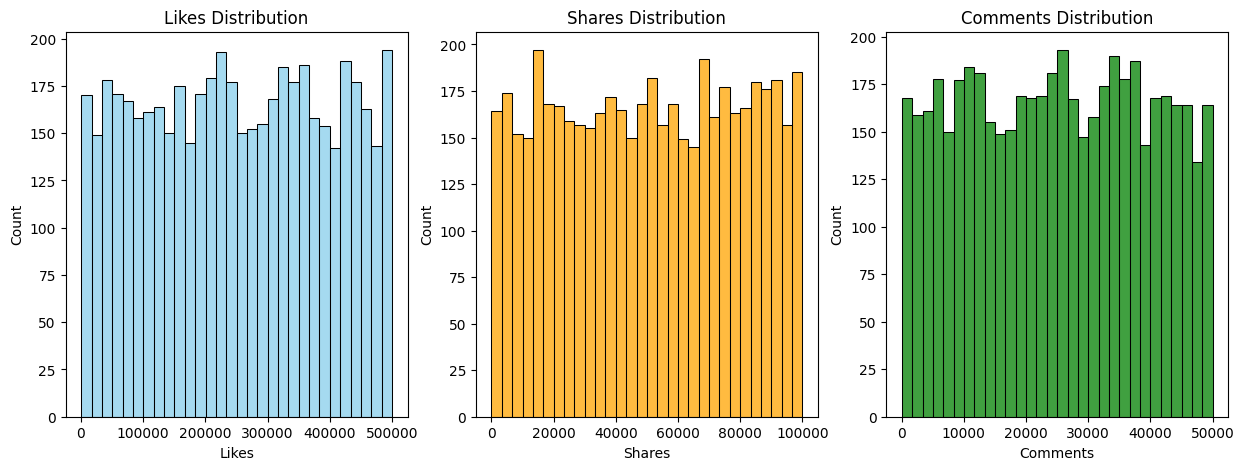

In [5]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df["Likes"], bins=30, ax=axes[0], color="skyblue")
axes[0].set_title("Likes Distribution")
sns.histplot(df["Shares"], bins=30, ax=axes[1], color="orange")
axes[1].set_title("Shares Distribution")
sns.histplot(df["Comments"], bins=30, ax=axes[2], color="green")
axes[2].set_title("Comments Distribution")
plt.show()

C:\Users\gitan\AppData\Local\Temp\ipykernel_8428\1444215905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_hashtags.index, x=top_hashtags.values, palette="viridis")


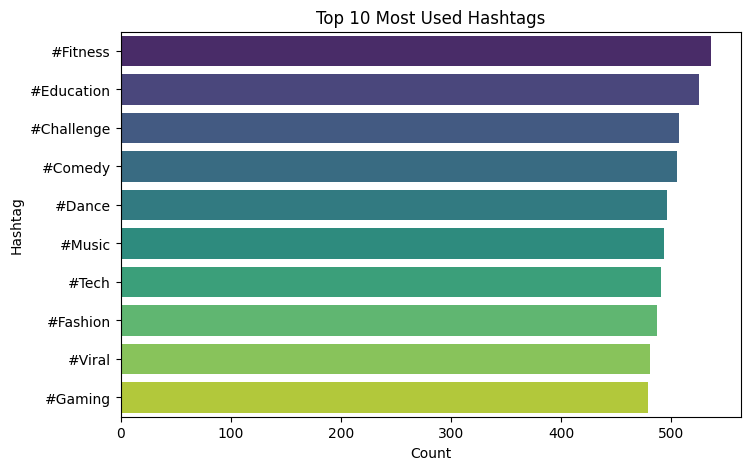

In [6]:
top_hashtags = df["Hashtag"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=top_hashtags.index, x=top_hashtags.values, palette="viridis")
plt.title("Top 10 Most Used Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()

C:\Users\gitan\AppData\Local\Temp\ipykernel_8428\3844685360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Platform", order=df["Platform"].value_counts().index, palette="coolwarm")


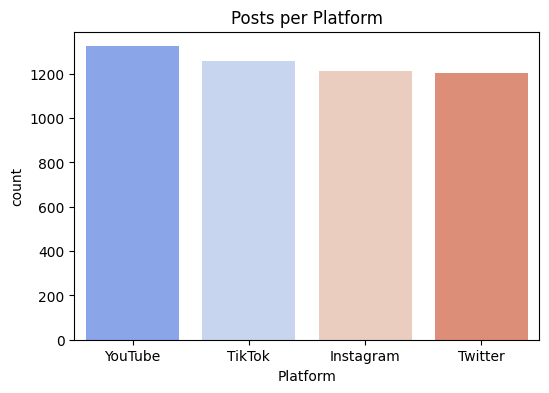

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Platform", order=df["Platform"].value_counts().index, palette="coolwarm")
plt.title("Posts per Platform")
plt.show()

C:\Users\gitan\AppData\Local\Temp\ipykernel_8428\385182834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette="mako")


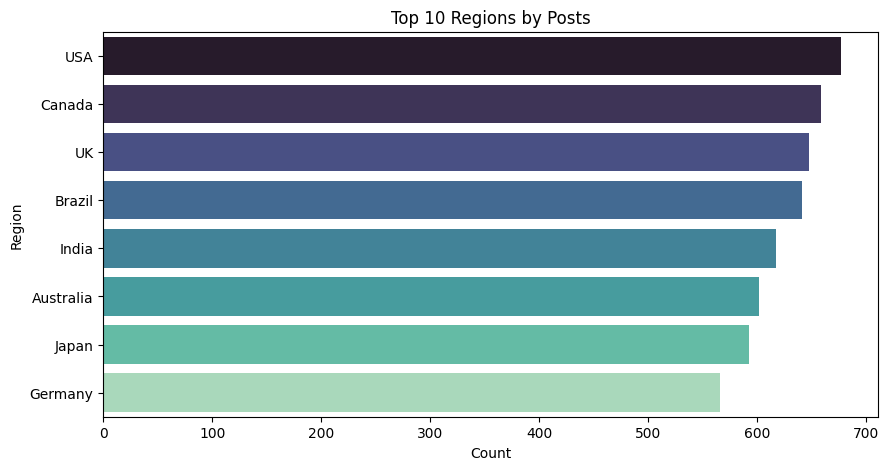

In [8]:
plt.figure(figsize=(10,5))
region_counts = df["Region"].value_counts().head(10)
sns.barplot(x=region_counts.values, y=region_counts.index, palette="mako")
plt.title("Top 10 Regions by Posts")
plt.xlabel("Count")
plt.show()

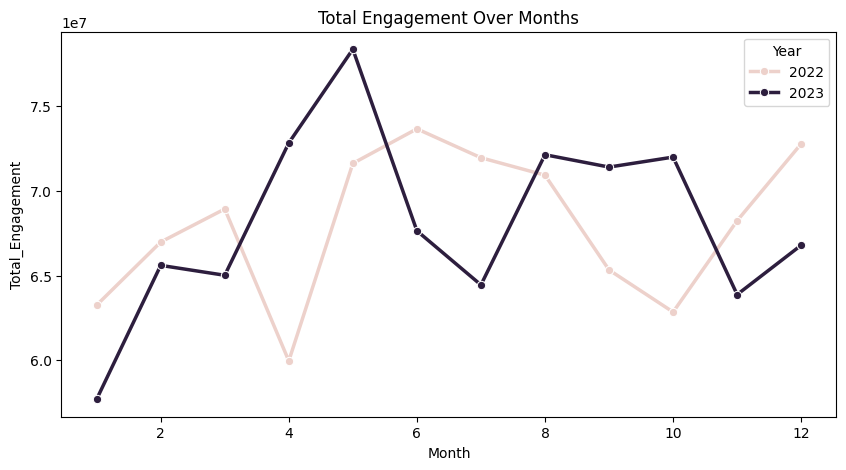

In [9]:
monthly_trends = df.groupby(["Year","Month"])["Total_Engagement"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_trends, x="Month", y="Total_Engagement", hue="Year", marker="o", linewidth=2.5)
plt.title("Total Engagement Over Months")
plt.show()

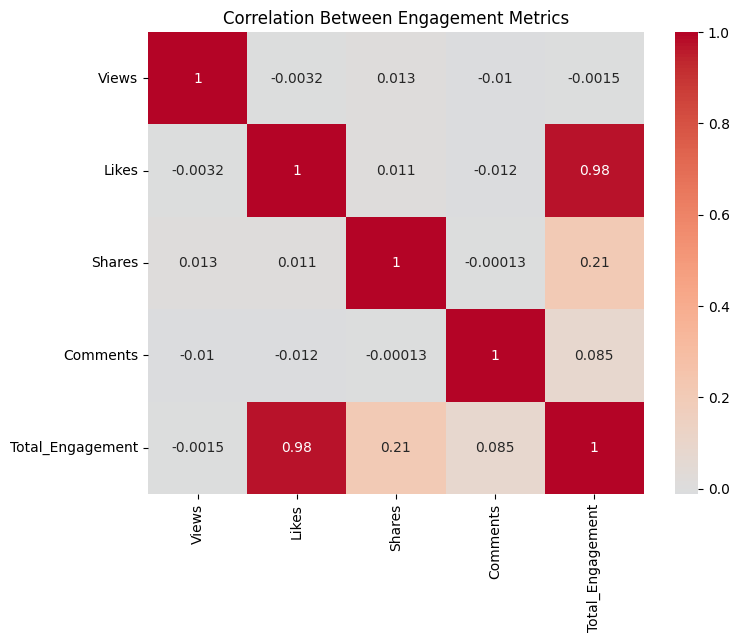

In [10]:
plt.figure(figsize=(8,6))
corr = df[["Views","Likes","Shares","Comments","Total_Engagement"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Engagement Metrics")
plt.show()

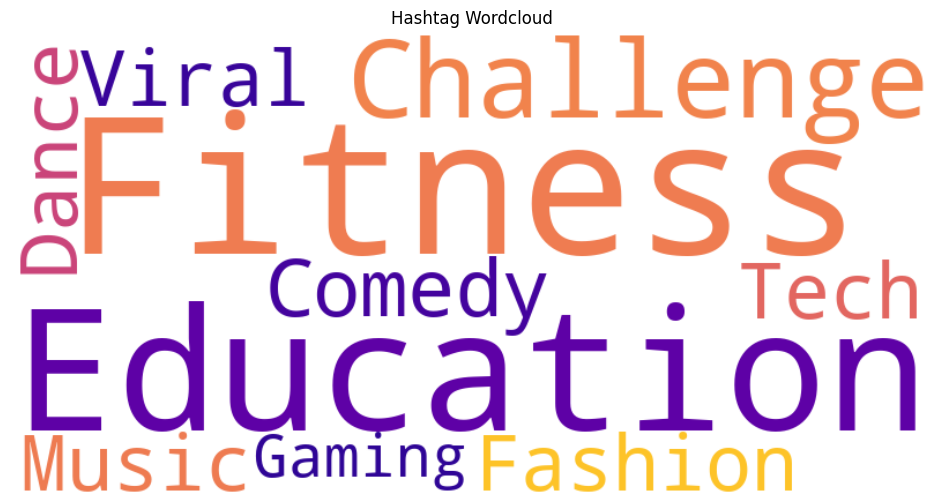

In [11]:
wc = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(" ".join(df["Hashtag"].astype(str)))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Hashtag Wordcloud")
plt.show()